In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
from io import StringIO

pd.set_option('display.max_columns', None)

In [3]:
path = os.getcwd()
raw_data_path = path + "/../data/raw/"

# Flight Data

In [4]:
base_url = "https://data.sfgov.org/resource/rkru-6vcg.csv"
limit  = 1000
offset = 0
data  = []

df_flight = pd.DataFrame()

data_path = raw_data_path +'/flight_raw.csv'

if not os.path.exists(data_path):
  while True:
    url = f"{base_url}?$limit={limit}&$offset={offset}"
    response = requests.get(url)
    if response.status_code == 200:
      if not offset%100000:
        print(f"Fetching data from {url}")
      batch_df = pd.read_csv(StringIO(response.text))
      if batch_df.empty:
        break
      df_flight = pd.concat([df_flight, batch_df], ignore_index=True)
      offset += limit
    else:
      print('Done!')
      break
    df_flight.to_csv(data_path, index=False)
else:
  df_flight = pd.read_csv(data_path)
  
df_flight.head()

,activity_period,activity_period_start_date,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,data_as_of,data_loaded_at
0,199907,1999-07-01T00:00:00.000,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,31432,2024-06-20T13:00:26.000,2024-06-22T15:01:45.000
1,199907,1999-07-01T00:00:00.000,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,31353,2024-06-20T13:00:26.000,2024-06-22T15:01:45.000
2,199907,1999-07-01T00:00:00.000,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,2518,2024-06-20T13:00:26.000,2024-06-22T15:01:45.000
3,199907,1999-07-01T00:00:00.000,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Deplaned,Other,Terminal 2,D,1324,2024-06-20T13:00:26.000,2024-06-22T15:01:45.000
4,199907,1999-07-01T00:00:00.000,Aeroflot Russian International Airlines,NaN,Aeroflot Russian International Airlines,NaN,International,Europe,Enplaned,Other,Terminal 2,D,1198,2024-06-20T13:00:26.000,2024-06-22T15:01:45.000


## flight dataset metadata

<div slot="body"><div class="schema-column-preview-table"><forge-table select="false" multiselect="true" dense="false" roomy="false" filter="false"><table class="forge-table"><thead><tr class="forge-table-row forge-table-head__row"><th scope="col" class="forge-table-cell forge-table-head__cell forge-table-head__cell--sortable"><button type="button" class="forge-table-head__cell-container"><span class="forge-table-head__cell-text">Column Name</span><forge-icon name="arrow_downward" class="forge-table-head__cell-sort-icon"></forge-icon><span class="forge-table-head__cell__sort-order--hidden forge-table-head__cell__sort-order"></span></button></th><th scope="col" class="forge-table-cell forge-table-head__cell"><div class="forge-table-head__cell-container"><span class="forge-table-head__cell-text">Description</span></div></th><th scope="col" class="forge-table-cell forge-table-head__cell forge-table-head__cell--sortable"><button type="button" class="forge-table-head__cell-container"><span class="forge-table-head__cell-text">API Field Name</span><forge-icon name="arrow_downward" class="forge-table-head__cell-sort-icon"></forge-icon><span class="forge-table-head__cell__sort-order--hidden forge-table-head__cell__sort-order"></span></button></th><th scope="col" class="forge-table-cell forge-table-head__cell forge-table-head__cell--sortable"><button type="button" class="forge-table-head__cell-container"><span class="forge-table-head__cell-text">Data Type</span><forge-icon name="arrow_downward" class="forge-table-head__cell-sort-icon"></forge-icon><span class="forge-table-head__cell__sort-order--hidden forge-table-head__cell__sort-order"></span></button></th></tr></thead><tbody><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon name="pound"></forge-icon><span>Activity Period</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>The year and month when this activity occurred</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>activity_period</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/number.html" target="_blank" rel="noreferrer">Number</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon name="calendar_clock"></forge-icon><span>Activity Period Start Date</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>Start date of the activity period</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>activity_period_start_date</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/floating_timestamp.html" target="_blank" rel="noreferrer">Floating Timestamp</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon name="text_fields"></forge-icon><span>Operating Airline</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>Airline name for the operator of aircraft with passenger activity. </div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>operating_airline</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon name="text_fields"></forge-icon><span>Operating Airline IATA Code</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>The International Air Transport Association (IATA) two-letter designation for the Operating Airline.</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>operating_airline_iata_code</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon name="text_fields"></forge-icon><span>Published Airline</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>Airline name that issues the ticket and books revenue for passenger activity.</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>published_airline</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon name="text_fields"></forge-icon><span>Published Airline IATA Code</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>The International Air Transport Association (IATA) two-letter designation for the Published Airline.</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>published_airline_iata_code</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon name="text_fields"></forge-icon><span>GEO Summary</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3;"><div>Designates whether the passenger activity in relation to SFO arrived from or departed to a location within the United States (“domestic”), or outside the United States (“international”) without stops.</div></div><forge-button type="flat" class="collapse-button"><button class="collapse-toggle forge-button">Read more<forge-open-icon></forge-open-icon><span class="forge-button__ripple"></span></button></forge-button></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>geo_summary</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon name="text_fields"></forge-icon><span>GEO Region</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3;"><div>Provides a more detailed breakdown of the GEO Summary field to designate the region in the world where activity in relation to SFO arrived from or departed to without stops.</div></div><forge-button type="flat" class="collapse-button"><button class="collapse-toggle forge-button mdc-ripple-upgraded">Read more<forge-open-icon></forge-open-icon><span class="forge-button__ripple"></span></button></forge-button></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>geo_region</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon name="text_fields"></forge-icon><span>Activity Type Code</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3;"><div>A description of the physical action a passenger took in relation to a flight, which includes boarding a flight (“enplanements”), getting off a flight (“deplanements”) and transiting to another location (“intransit")</div></div><forge-button type="flat" class="collapse-button"><button class="collapse-toggle forge-button">Read more<forge-open-icon></forge-open-icon><span class="forge-button__ripple"></span></button></forge-button></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>activity_type_code</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon name="text_fields"></forge-icon><span>Price Category Code</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>A categorization of whether a Published Airline is a low-cost carrier or not a low-cost carrier.</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>price_category_code</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon name="text_fields"></forge-icon><span>Terminal</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>Name of a terminal of the airport</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>terminal</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon name="text_fields"></forge-icon><span>Boarding Area</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>Letter that represents a boarding area</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>boarding_area</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/text.html" target="_blank" rel="noreferrer">Text</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon name="pound"></forge-icon><span>Passenger Count</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>Total number of passengers this month</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>passenger_count</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/number.html" target="_blank" rel="noreferrer">Number</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon name="calendar_clock"></forge-icon><span>data_as_of</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>Datetime of data as of </div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>data_as_of</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/floating_timestamp.html" target="_blank" rel="noreferrer">Floating Timestamp</a></div></div></div></td></tr><tr class="forge-table-row forge-table-body__row"><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-name-cell"><forge-icon name="calendar_clock"></forge-icon><span>data_loaded_at</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-expandable-wrapper"><div class="expandable-text-section forge-typography--body1 description-expandable-text-section"><div class="collapsed-text-section" style="-webkit-line-clamp: 3; --display-line-count: 3;"><div>Datetime of data loaded at</div></div></div></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-field-name-cell"><span>data_loaded_at</span></div></div></div></td><td class="forge-table-cell forge-table-body__cell"><div class="forge-table-cell__container" data-cell-template=""><div><div class="schema-column-data-type-cell"><a href="https://dev.socrata.com/docs/datatypes/floating_timestamp.html" target="_blank" rel="noreferrer">Floating Timestamp</a></div></div></div></td></tr></tbody></table></forge-table></div><div class="table-paginator"><forge-paginator page-size="15" pagesize="15" total="15"></forge-paginator></div></div>

In [5]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35993 entries, 0 to 35992
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   activity_period              35993 non-null  int64 
 1   activity_period_start_date   35993 non-null  object
 2   operating_airline            35993 non-null  object
 3   operating_airline_iata_code  35677 non-null  object
 4   published_airline            35993 non-null  object
 5   published_airline_iata_code  35677 non-null  object
 6   geo_summary                  35993 non-null  object
 7   geo_region                   35993 non-null  object
 8   activity_type_code           35993 non-null  object
 9   price_category_code          35993 non-null  object
 10  terminal                     35993 non-null  object
 11  boarding_area                35993 non-null  object
 12  passenger_count              35993 non-null  int64 
 13  data_as_of                   35

In [6]:
df_flight=df_flight.drop(columns=['data_as_of','data_loaded_at'])

In [7]:
df_flight.isna().sum()

activity_period                  0
activity_period_start_date       0
operating_airline                0
operating_airline_iata_code    316
published_airline                0
published_airline_iata_code    316
geo_summary                      0
geo_region                       0
activity_type_code               0
price_category_code              0
terminal                         0
boarding_area                    0
passenger_count                  0
dtype: int64

In [8]:
df_flight.duplicated(keep=False).sum()

0

### Let's start by getting the data we need within the appropriate date range


In [9]:

df_flight['activity_period'] = pd.to_datetime(df_flight['activity_period'].astype(str).apply(lambda x: x[:4]+'-'+x[4:]), format='%Y-%m')

In [10]:
df_flight['activity_period'] = df_flight['activity_period']

In [11]:
df_flight = df_flight[df_flight['activity_period'].dt.year >= 2018]

In [12]:
df_flight =df_flight.reset_index()

### I want to reshape the flight dataset as date, total_deplaned and total_enplaned
### That will give us an idea of population change per month for San Francisco.

In [13]:
enplaned = pd.DataFrame(df_flight[df_flight['activity_type_code'] == 'Enplaned'].groupby('activity_period')['passenger_count'].sum())
enplaned.rename(columns={'passenger_count':'enplaned_passenger'}, inplace=True)
deplaned = pd.DataFrame(df_flight[df_flight['activity_type_code'] == 'Deplaned'].groupby('activity_period')['passenger_count'].sum())
deplaned.rename(columns={'passenger_count':'deplaned_passenger'}, inplace=True)
df_flight = deplaned.merge(enplaned, on='activity_period')
df_flight.reset_index(inplace=True)
df_flight.head()

,activity_period,deplaned_passenger,enplaned_passenger
0,2018-01-01,2172552,2016637
1,2018-02-01,1944768,1936989
2,2018-03-01,2320899,2352210
3,2018-04-01,2393156,2318680
4,2018-05-01,2510276,2513125


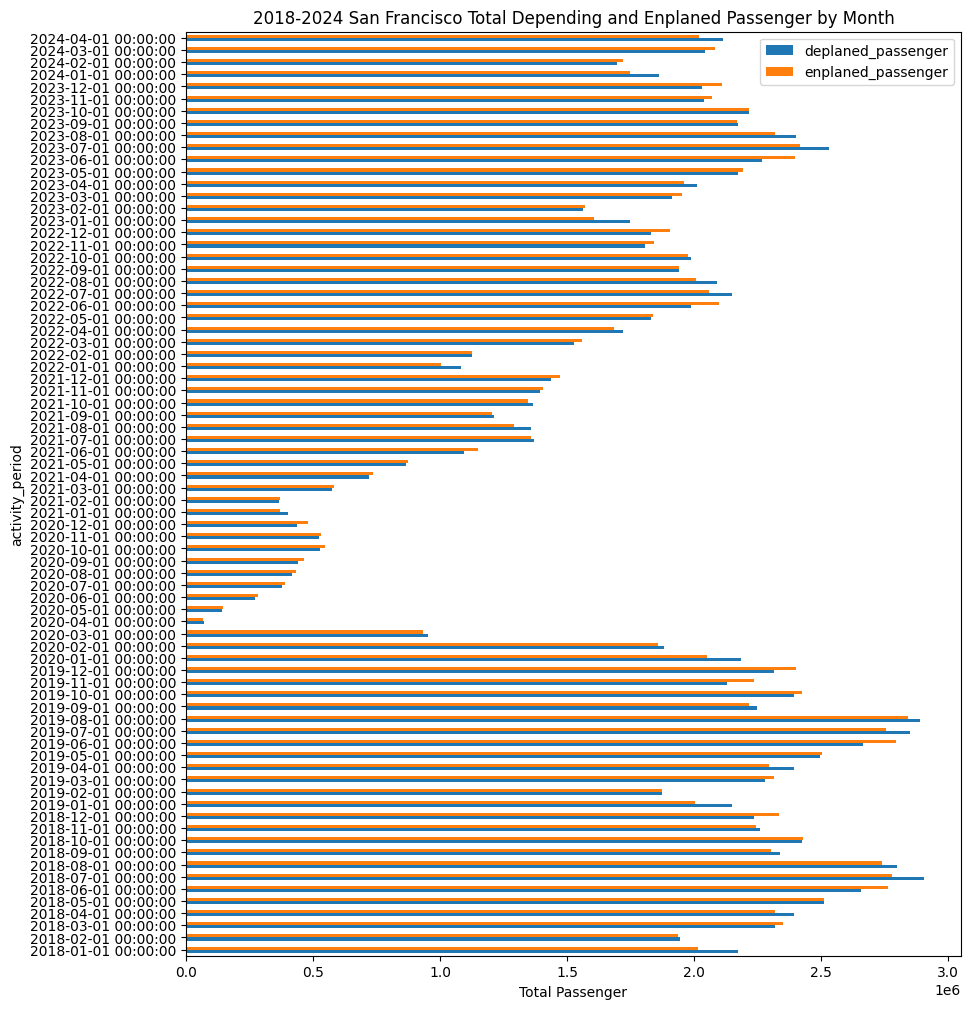

In [16]:
ax = df_flight.set_index('activity_period').plot(kind='barh', figsize=(10,12))
plt.title("2018-2024 San Francisco Total Depending and Enplaned Passenger by Month")
plt.xlabel('Total Passenger')
plt.show()

In [18]:
df_flight.to_csv(path+"/../data/processed/flight_processed.csv", index=False)